In [1]:
import pandas as pd
import unicodedata
import nltk
from nltk.corpus import stopwords
from transformers import AutoTokenizer

In [2]:
# load the dataset 
df = pd.read_csv("ComplaintsDataset.csv")

In [3]:
df.head(100)

,Entry Id,Θεματική Ενότητα,Υποενότητα,Θέμα,Μέσο,Γραμμή,Λεπτομέρειες,Κατεύθυνση9,Ημερομηνία,Ώρα Συμβάντος11,Διεύθυνση (T.K.),Entry Date
0,3394,Υπηρεσίες ΟΑΣΑ,Ηλεκτρονικό Εισιτήριο,NaN,NaN,NaN,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,NaN,NaN,NaN,71305,2022-01-31 21:16:52
1,3393,Λεωφορεία – ΚΤΕΛ,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων,NaN,Λεωφορείο,122,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,NaN,NaN,NaN,19013,2022-01-31 20:24:30
2,3392,Λεωφορεία - Τρόλεϊ,Συμπεριφορά Προσωπικού,NaN,Λεωφορείο,22,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,NaN,NaN,NaN,11361,2022-01-31 20:13:48
3,3391,Μετρό - Τραμ,Καταγγελίες,NaN,Τραμ,Αγία Τριάδα,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Τέρμα,2022-01-31,18:15,18534,2022-01-31 18:22:08
4,3390,Μετρό - Τραμ,Καταγγελίες,NaN,Μετρό,3,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Τέρμα,2022-01-31,16:00,10435,2022-01-31 17:35:29
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3296,Υπηρεσίες ΟΑΣΑ,Ηλεκτρονικό Εισιτήριο,NaN,NaN,NaN,"Καλημέρα,\n\nΕίμαι κάτοχος της κάρτα με αριθμό...",NaN,NaN,NaN,16673,2022-01-20 14:27:52
96,3295,Υπηρεσίες ΟΑΣΑ,Aυτόματα Eκδoτήρια Eισιτηρίων (AMEK),NaN,NaN,NaN,"Καλημέρα,\n\nΕίμαι κάτοχος της κάρτα με αριθμό...",NaN,NaN,NaN,16673,2022-01-20 14:00:23
97,3294,Λεωφορεία - Τρόλεϊ,Καταγγελίες,NaN,Λεωφορείο,35,"Στο λεωφορείο 035, σειρά 131 και αριθμό κυκλοφ...",NaN,NaN,NaN,-,2022-01-20 13:36:56
98,3293,Λεωφορεία - Τρόλεϊ,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων,NaN,Λεωφορείο,821,"Καλημερα, θα ηθλενα να σας ενημερωσω οτι ο οδη...",NaN,NaN,NaN,12136,2022-01-20 10:58:24


In [4]:
# correcting columns names 
df.rename(columns={"Κατεύθυνση9":"Κατεύθυνση","Ώρα Συμβάντος11":"Ώρα Συμβάντος"})

,Entry Id,Θεματική Ενότητα,Υποενότητα,Θέμα,Μέσο,Γραμμή,Λεπτομέρειες,Κατεύθυνση,Ημερομηνία,Ώρα Συμβάντος,Διεύθυνση (T.K.),Entry Date
0,3394,Υπηρεσίες ΟΑΣΑ,Ηλεκτρονικό Εισιτήριο,NaN,NaN,NaN,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,NaN,NaN,NaN,71305,2022-01-31 21:16:52
1,3393,Λεωφορεία – ΚΤΕΛ,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων,NaN,Λεωφορείο,122,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,NaN,NaN,NaN,19013,2022-01-31 20:24:30
2,3392,Λεωφορεία - Τρόλεϊ,Συμπεριφορά Προσωπικού,NaN,Λεωφορείο,22,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,NaN,NaN,NaN,11361,2022-01-31 20:13:48
3,3391,Μετρό - Τραμ,Καταγγελίες,NaN,Τραμ,Αγία Τριάδα,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Τέρμα,2022-01-31,18:15,18534,2022-01-31 18:22:08
4,3390,Μετρό - Τραμ,Καταγγελίες,NaN,Μετρό,3,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Τέρμα,2022-01-31,16:00,10435,2022-01-31 17:35:29
...,...,...,...,...,...,...,...,...,...,...,...,...
7133,9733,Λεωφορεία – ΚΤΕΛ,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων,NaN,Λεωφορείο,308,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,NaN,NaN,NaN,19002,2022-12-01 8:30:48
7134,9732,Λεωφορεία - Τρόλεϊ,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων,NaN,Λεωφορείο,730,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,NaN,NaN,NaN,13231,2022-12-01 8:27:57
7135,9731,Λεωφορεία - Τρόλεϊ,Συμπεριφορά Προσωπικού,NaN,Λεωφορείο,2 ή 4,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",NaN,NaN,NaN,11364,2022-12-01 8:15:11
7136,9730,Λεωφορεία - Τρόλεϊ,Καταγγελίες,NaN,Λεωφορείο,731,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,NaN,NaN,NaN,10443,2022-12-01 7:48:28


In [5]:
df.to_csv('ComplaintsDataset.csv',index=False)

In [6]:
#create datasets for the classification tasks
problem_data = df[['Λεπτομέρειες','Υποενότητα']].rename(columns={'Λεπτομέρειες':'text','Υποενότητα':'label'})
transport_data = df[['Λεπτομέρειες','Μέσο']].rename(columns={'Λεπτομέρειες':'text','Μέσο':'label'})
line_data = df[['Λεπτομέρειες','Γραμμή']].rename(columns={'Λεπτομέρειες':'text','Γραμμή':'label'})

In [7]:
problem_data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,Ηλεκτρονικό Εισιτήριο
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,Συμπεριφορά Προσωπικού
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Καταγγελίες
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Καταγγελίες
...,...,...
7133,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7134,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7135,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",Συμπεριφορά Προσωπικού
7136,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,Καταγγελίες


In [8]:
transport_data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,NaN
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,Λεωφορείο
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,Λεωφορείο
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Τραμ
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Μετρό
...,...,...
7133,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,Λεωφορείο
7134,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,Λεωφορείο
7135,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",Λεωφορείο
7136,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,Λεωφορείο


In [9]:
line_data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,NaN
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,122
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,22
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Αγία Τριάδα
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",3
...,...,...
7133,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,308
7134,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,730
7135,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",2 ή 4
7136,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,731


In [10]:
dataframes = [problem_data,transport_data,line_data]

for df in dataframes:
    print('NaN values in text column: ',df['text'].isna().sum(),'NaN values in label column: ', df['label'].isna().sum())   

NaN values in text column:  2 NaN values in label column:  9
NaN values in text column:  2 NaN values in label column:  1336
NaN values in text column:  2 NaN values in label column:  1306


In [11]:
# drop all rows with NaN values 
for df in dataframes:
    df.dropna(subset=['text', 'label'], inplace=True)
    

for df in dataframes:
    print('NaN values in text column: ',df['text'].isna().sum(),'NaN values in label column: ', df['label'].isna().sum())

NaN values in text column:  0 NaN values in label column:  0
NaN values in text column:  0 NaN values in label column:  0
NaN values in text column:  0 NaN values in label column:  0


In [12]:
problem_data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,Ηλεκτρονικό Εισιτήριο
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,Συμπεριφορά Προσωπικού
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Καταγγελίες
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Καταγγελίες
...,...,...
7133,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7134,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7135,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",Συμπεριφορά Προσωπικού
7136,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,Καταγγελίες


In [13]:
transport_data

,text,label
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,Λεωφορείο
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,Λεωφορείο
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Τραμ
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Μετρό
5,Πινακιδα οχηματος ΧΕΗ 8345 \nαριθμος οχηματος ...,Λεωφορείο
...,...,...
7133,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,Λεωφορείο
7134,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,Λεωφορείο
7135,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",Λεωφορείο
7136,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,Λεωφορείο


In [14]:
# checking that texts are strings 
dataframes = {'problem_data':problem_data,'transport_data':transport_data,'line_data':line_data}
for key, df in dataframes.items():
    for text in df['text']:
        if not isinstance(text, str):
            print("non-string object in ", key, "text column!")
            break
    else:
        print(key, "texts are strings")

problem_data texts are strings
transport_data texts are strings
line_data texts are strings


In [15]:
# same for labels
dataframes = {'problem_data':problem_data,'transport_data':transport_data,'line_data':line_data}
for key, df in dataframes.items():
    for label in df['label']:
        if not isinstance(label, str):
            print("non-string object in ", key, "label column!")
            break
    else:
        print(key, "labels are strings")

problem_data labels are strings
transport_data labels are strings
line_data labels are strings


# Problem Data

In [16]:
data = problem_data

In [17]:
data = data.reset_index(drop=True)

In [18]:
data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,Ηλεκτρονικό Εισιτήριο
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,Συμπεριφορά Προσωπικού
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,Καταγγελίες
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",Καταγγελίες
...,...,...
7122,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7123,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων
7124,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",Συμπεριφορά Προσωπικού
7125,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,Καταγγελίες


In [19]:
#checking label frequencies 
label_counts = data['label'].value_counts()
label_counts

Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων           2449
Καταγγελίες                                    1536
Συμπεριφορά Προσωπικού                          914
Άλλο                                            503
Ηλεκτρονικό Εισιτήριο                           380
Καταγγελίες - Αναφορές                          194
Μεταβολές Διαδρομών Γραμμών                     161
Κατάσταση Οχημάτων                              128
Συχνότητες Δρομολογίων                          119
Τηλεματική                                      114
COVID19 - Τήρηση Μέτρων Προστασίας               92
Αυτόματα Εκδοτήρια Εισιτηρίων σε Σταθμούς        88
Τροποποιήσεις Δικτύου                            59
Aυτόματα Eκδoτήρια Eισιτηρίων (AMEK)             48
Ατυχήματα                                        45
Επιλέξτε υποενότητα                              38
Προγραμματισμός Δρομολογίων                      33
Πρόστιμα - Ελεγκτές Κομίστρου                    31
Κατάσταση Συρμών                                 29
Βλάβες Ασανσ

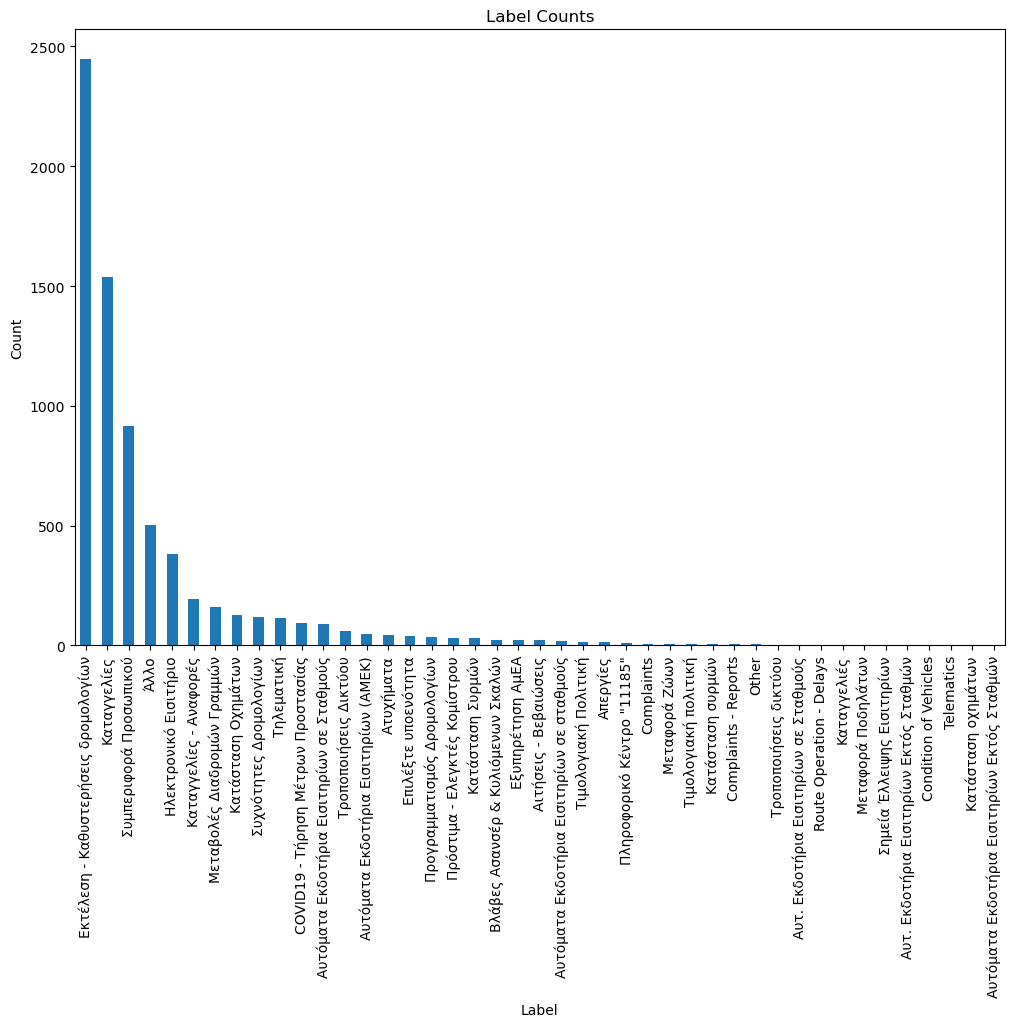

In [20]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar',figsize=(12, 8))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [21]:
# Merge all low-frequency classes into the class "Άλλο"
low_freq_labels = label_counts[label_counts < 380].index.tolist()
data.loc[data['label'].isin(low_freq_labels), 'label'] = 'Άλλο'

In [22]:
#checking label frequencies 
label_counts = data['label'].value_counts()
label_counts

Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων    2449
Άλλο                                    1848
Καταγγελίες                             1536
Συμπεριφορά Προσωπικού                   914
Ηλεκτρονικό Εισιτήριο                    380
Name: label, dtype: int64

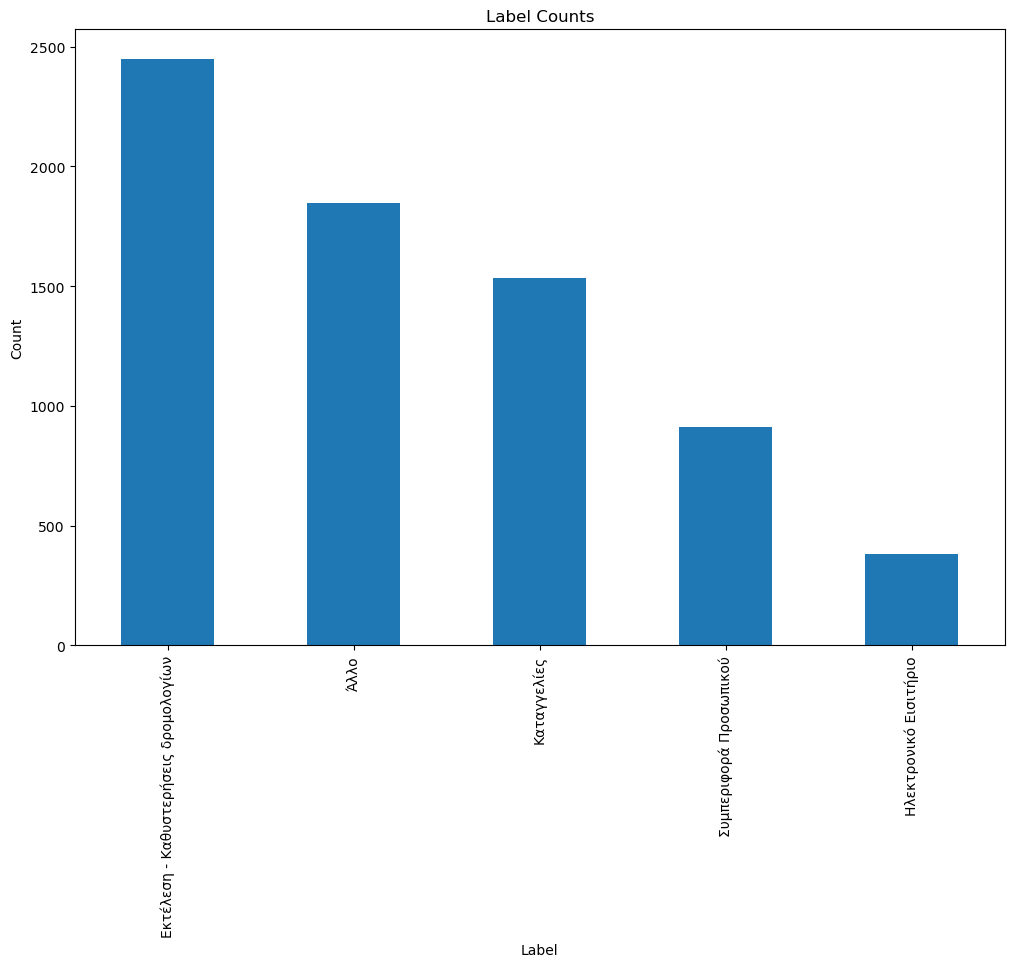

In [23]:
# Plot the label counts as a bar chart
label_counts.plot(kind='bar',figsize=(12, 8))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [24]:
# save labels in a list
label_list = data['label'].unique()
label_list

array(['Ηλεκτρονικό Εισιτήριο', 'Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων',
       'Συμπεριφορά Προσωπικού', 'Καταγγελίες', 'Άλλο'], dtype=object)

In [25]:
# Map the labels to integers
label_ids = {label: i for i, label in enumerate(label_list)}
label_ids

{'Ηλεκτρονικό Εισιτήριο': 0,
 'Eκτέλεση - Kαθυστερήσεις δρoμoλoγίων': 1,
 'Συμπεριφορά Προσωπικού': 2,
 'Καταγγελίες': 3,
 'Άλλο': 4}

In [26]:
# Replace label names with their corresponding values
data['label'] = [label_ids[label] for label in data['label']]

In [27]:
data

,text,label
0,Καλημερα σας ειμαι κατοχος της υπαριθμον 300...,0
1,Αγαπητοί κύριοι καλησπέρα σας σήμερα 31/1 2022...,1
2,στης 19.01 μπήκα στο λεωφορείο 022 για να παω ...,2
3,Σταθμός Τραμ Γήπεδο Καραϊσκάκη. Το τηλέφωνο έκ...,3
4,"Σταθμός Κεραμεικός, γραμμή 3 . Επιχείρησα να α...",3
...,...,...
7122,Καλημέρα σας!\n\nΠαρακαλώ θα ήθελα να ενημερωθ...,1
7123,Καλημέρα σας και καλό μηνα. Το λεωφορείο 730 α...,1
7124,"Καλημέρα σας, \nΑπαράδεκτος οδηγός, καθώς η κο...",2
7125,Το δρομολόγιο των 7 και 20 ενημερώστε με γιατί...,3


In [28]:
# strip accetns and lowercase functiom
def strip_accents_and_lowercase(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn').lower()

data['text'] = data['text'].apply(strip_accents_and_lowercase)

In [29]:
data

,text,label
0,καλημερα σας ειμαι κατοχος της υπαριθμον 300...,0
1,αγαπητοι κυριοι καλησπερα σας σημερα 31/1 2022...,1
2,στης 19.01 μπηκα στο λεωφορειο 022 για να παω ...,2
3,σταθμος τραμ γηπεδο καραισκακη. το τηλεφωνο εκ...,3
4,"σταθμος κεραμεικος, γραμμη 3 . επιχειρησα να α...",3
...,...,...
7122,καλημερα σας!\n\nπαρακαλω θα ηθελα να ενημερωθ...,1
7123,καλημερα σας και καλο μηνα. το λεωφορειο 730 α...,1
7124,"καλημερα σας, \nαπαραδεκτος οδηγος, καθως η κο...",2
7125,το δρομολογιο των 7 και 20 ενημερωστε με γιατι...,3


In [30]:
# remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('greek'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)


data['text'] = data['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data

,text,label
0,καλημερα σας κατοχος της υπαριθμον 30010100311...,0
1,αγαπητοι κυριοι καλησπερα σας σημερα 31/1 2022...,1
2,στης 19.01 μπηκα λεωφορειο 022 παω τερμα δυο σ...,2
3,σταθμος τραμ γηπεδο καραισκακη. τηλεφωνο εκτακ...,3
4,"σταθμος κεραμεικος, γραμμη 3 . επιχειρησα αναν...",3
...,...,...
7122,καλημερα σας! παρακαλω ηθελα ενημερωθω ακυρωση...,1
7123,καλημερα σας καλο μηνα. λεωφορειο 730 τερμα τη...,1
7124,"καλημερα σας, απαραδεκτος οδηγος, καθως κοπελα...",2
7125,δρομολογιο 7 20 ενημερωστε γιατι περασε ποτε.,3


In [34]:
data.to_csv('ProblemData.csv',index=False)

In [32]:
# Load greek BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlpaueb/bert-base-greek-uncased-v1')

In [33]:
# testing the tokenizer: ids, type, attention masks
tokenizer("ως απαντηση μηνυματος σας 16η μαρτιου 2022")

{'input_ids': [101, 387, 1086, 12065, 383, 560, 267, 1277, 22669, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [35]:
# testing the tokenizer : tokens
tokenizer.convert_ids_to_tokens(tokenizer.encode("ως απαντηση μηνυματος σας 16η μαρτιου 2022",add_special_tokens=False))

['ως', 'απαντηση', 'μηνυματος', 'σας', '16', '##η', 'μαρτιου', '2022']

In [39]:
#tokenize texts and find number of texts with more than 512 tokens 
LongTextsCount = 0
for text in data['text']:
    tokenized = tokenizer.encode(text, truncation=False,return_tensors='pt', add_special_tokens=True)
    if tokenized.size()[1] > 512:
        LongTextsCount += 1

print("Number of texts with more than 512 tokens: ", LongTextsCount)


Number of texts with more than 512 tokens:  26


In [40]:
# Drop long texts since there's too few of them
LongTextIdx = []
for i, text in enumerate(data['text']):
    tokenized = tokenizer.encode(text, truncation=False, return_tensors='pt', add_special_tokens=True)
    if tokenized.size()[1] > 512:
        LongTextIdx.append(i)

data = data.drop(index=LongTextIdx).reset_index(drop=True)

data

,text,label
0,καλημερα σας κατοχος της υπαριθμον 30010100311...,0
1,αγαπητοι κυριοι καλησπερα σας σημερα 31/1 2022...,1
2,στης 19.01 μπηκα λεωφορειο 022 παω τερμα δυο σ...,2
3,σταθμος τραμ γηπεδο καραισκακη. τηλεφωνο εκτακ...,3
4,"σταθμος κεραμεικος, γραμμη 3 . επιχειρησα αναν...",3
...,...,...
7096,καλημερα σας! παρακαλω ηθελα ενημερωθω ακυρωση...,1
7097,καλημερα σας καλο μηνα. λεωφορειο 730 τερμα τη...,1
7098,"καλημερα σας, απαραδεκτος οδηγος, καθως κοπελα...",2
7099,δρομολογιο 7 20 ενημερωστε γιατι περασε ποτε.,3


In [41]:
data.sample(n=20)

,text,label
2704,ηθελα αναφερω σταθμο ομονοια ηλεκτρικου γραμμη...,4
938,λεωφορειο εκανε καμια διαδρομη αναγραφομενη ωρ...,1
4404,καλησπερα σας παρακαλω πολυ φτιαξτε ενα app ιp...,0
956,καλησπερα σας γνωστοποιω σημερα γυρω στις 8 ωρ...,3
1263,υπαρχει λεωφορειο κινειται προγραμμα δρομολογι...,1
2773,"σημερα, πεμπτη 28 ιουλιου 2022, προαστιακος πε...",4
2209,ηρθε λεωφορειο 8.10 αφετηρια χωρις ενημερωση. ...,4
3829,"καλησπερα σας, αγενεστατη συμπεριφορα οδηγου σ...",2
2681,λεωφορειο 305 τερμα προς νομισμ συνεχως επανελ...,1
6612,δεδομενου επιβατες-χρηστες (οπως αιτων) της γρ...,4


In [42]:
data.to_csv('ProblemData.csv',index=False)

# Transport Data

In [ ]:
data = transport_data
data = data.reset_index(drop=True)
data

In [ ]:
#checking label frequencies 
label_counts = data['label'].value_counts()
label_counts

In [ ]:
# Plot the label counts as a bar chart
label_counts.plot(kind='bar',figsize=(12, 8))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [ ]:
# Merge all low-frequency classes into the class "Άλλο"
low_freq_labels = label_counts[label_counts < 431].index.tolist()
data.loc[data['label'].isin(low_freq_labels), 'label'] = 'Άλλο'

In [ ]:
#checking label frequencies 
label_counts = data['label'].value_counts()
label_counts

In [ ]:
# Plot the label counts as a bar chart
label_counts.plot(kind='bar',figsize=(12, 8))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [ ]:
# save labels in a list
label_list = data['label'].unique()
label_list

In [ ]:
# Map the labels to integers
label_ids = {label: i for i, label in enumerate(label_list)}
label_ids

In [ ]:
# Replace label names with their corresponding values
data['label'] = [label_ids[label] for label in data['label']]

In [ ]:
data

In [ ]:
data.sample(n=20)

In [ ]:
data.to_csv('TransportData.csv',index=False)

# Line Data

In [ ]:
data=line_data
data = data.reset_index(drop=True)
data

In [ ]:
label_counts = data['label'].value_counts()
label_counts

In [ ]:
#plotting label frequencies 
label_counts.plot(kind='bar',figsize=(12, 8))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [ ]:
# Merge all low-frequency classes into the class "Άλλο"
low_freq_labels = label_counts[label_counts < 13].index.tolist()
data.loc[data['label'].isin(low_freq_labels), 'label'] = 'Άλλο'

In [ ]:
label_counts = data['label'].value_counts()
label_counts

In [ ]:
#plotting label frequencies 
label_counts.plot(kind='bar',figsize=(18, 15))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [ ]:
# Too many buslines mentioned too few times. Droping them. 
data = data.loc[data['label'] != 'Άλλο']
data = data.reset_index(drop=True)

In [ ]:
label_counts = data['label'].value_counts()
label_counts

In [ ]:
#plotting label frequencies 
label_counts.plot(kind='bar',figsize=(20, 18))

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

plt.show()

In [ ]:
# save labels in a list
label_list = data['label'].unique()
label_list

In [ ]:
# Map the labels to integers
label_ids = {label: i for i, label in enumerate(label_list)}
label_ids

In [ ]:
# Replace label names with their corresponding values
data['label'] = [label_ids[label] for label in data['label']]

In [ ]:
data

In [ ]:
data.sample(n=20)

In [ ]:
data.to_csv('LineData.csv',index=False)